## Observations and Insights

## Dependencies and starter code

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_study = pd.DataFrame.merge(mouse_metadata, study_results, how='outer',on='Mouse ID')
merged_study.to_csv('merged_study', index = False)
merged_study

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

## Summary statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

merged_study.groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='mean'),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='median'),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='var'),
    Std_Dev=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='std'),
    SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='sem')
 )


Mean     Median   Variance   Std_Dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

Text(0, 0.5, 'Number of Data Points')

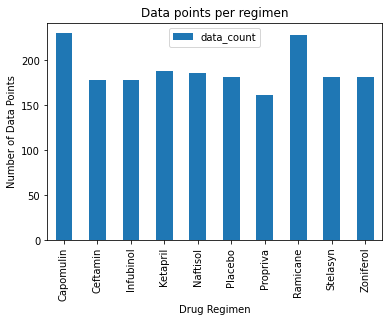

In [104]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = merged_study.groupby('Drug Regimen').agg(
    data_count=pd.NamedAgg(column='Timepoint', aggfunc='count')
)

dp = data_points.plot(kind='bar', title="Data points per regimen")
dp.set_ylabel('Number of Data Points')

Text(0, 0.5, 'Number of data points')

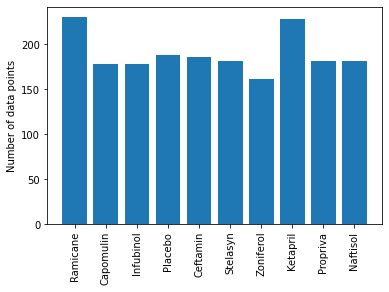

In [102]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = pd.unique(merged_study['Drug Regimen'])
count = data_points['data_count']
plt.bar(x_axis, count)
plt.xticks(x_axis, rotation='vertical')
plt.ylabel("Number of data points")

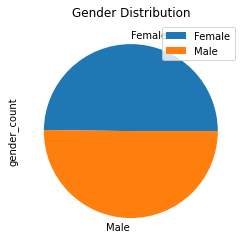

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = mouse_metadata.groupby('Sex').agg(
    gender_count=pd.NamedAgg(column='Sex', aggfunc='count')
)
gender_count

plot = gender_count.plot.pie(y='gender_count', title="Gender Distribution")


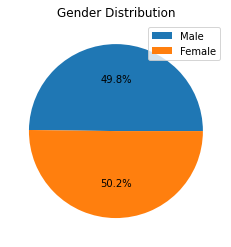

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = pd.unique(mouse_metadata['Sex'])
axis = gender_count['gender_count']
#axis
piepie = plt.pie(axis,autopct='%1.1f%%')
plt.legend(labels)
plt.title('Gender Distribution')
plt.show()
#len(axis)

## Quartiles, outliers and boxplots

Text(0, 0.5, 'umor Volume (mm3)')

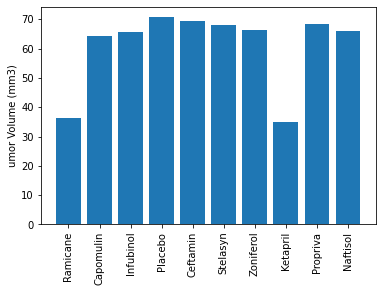

In [101]:
# Using chart of final tumor volumes to determine which drugs are promising options.
final_vol = merged_study.loc[merged_study["Timepoint"] == 45, [
    "Drug Regimen", "Tumor Volume (mm3)", "Timepoint"]]
final_group = final_vol.groupby('Drug Regimen').mean()
y_axis = final_group["Tumor Volume (mm3)"]
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, rotation='vertical')
plt.ylabel("umor Volume (mm3)")


In [50]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# Create df for each of the chosen drugs individually
rami_reg = final_vol.loc[final_vol["Drug Regimen"] == "Ramicane"] 
keta_reg = final_vol.loc[final_vol["Drug Regimen"] == "Ketapril"]
capo_reg = final_vol.loc[final_vol["Drug Regimen"] == "Capomulin"]
infu_reg = final_vol.loc[final_vol["Drug Regimen"] == "Infubinol"]
# Caclulate quartiles then find IQR
rquartiles = rami_reg['Tumor Volume (mm3)'].quantile([.25,.5,.75])
rlowerq = rquartiles[0.25]
rupperq = rquartiles[0.75]
riqr = rupperq-rlowerq
rlow = rlowerq - (1.5*riqr)
rup = rupperq + (1.5*riqr)

kquartiles = keta_reg['Tumor Volume (mm3)'].quantile([.25,.5,.75])
klowerq = kquartiles[0.25]
kupperq = kquartiles[0.75]
kiqr = kupperq-klowerq
klow = klowerq - (1.5*kiqr)
kup = kupperq + (1.5*kiqr)

cquartiles = capo_reg['Tumor Volume (mm3)'].quantile([.25,.5,.75])
clowerq = cquartiles[0.25]
cupperq = cquartiles[0.75]
ciqr = cupperq-clowerq
clow = clowerq - (1.5*ciqr)
cup = cupperq + (1.5*ciqr)

iquartiles = infu_reg['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ilowerq = iquartiles[0.25]
iupperq = iquartiles[0.75]
iiqr = iupperq-ilowerq
ilow = ilowerq - (1.5*iiqr)
iup = iupperq + (1.5*iiqr)

# Determine outlier values
rout = rami_reg.loc[(rami_reg['Tumor Volume (mm3)'] < rlow) | (rami_reg['Tumor Volume (mm3)'] > rup)]
kout = keta_reg.loc[(keta_reg['Tumor Volume (mm3)'] < klow) | (keta_reg['Tumor Volume (mm3)'] > kup)]
cout = capo_reg.loc[(capo_reg['Tumor Volume (mm3)'] < clow) | (capo_reg['Tumor Volume (mm3)'] > cup)]
iout = infu_reg.loc[(infu_reg['Tumor Volume (mm3)'] < ilow) | (infu_reg['Tumor Volume (mm3)'] > iup)]

if len(rout) > 0:
    print(f"Ramicane outliers are {rout}")
if len(kout) > 0:
    print(f"Ketapril outliers are {kout}")
if len(cout) > 0:
    print(f"Capomulin outliers are {cout}")
if len(iout) > 0:
    print(f"Infubinol outliers are {iout}")

drugs = [rami_reg, keta_reg, capo_reg, infu_reg]
merge_drug_df = pd.concat(drugs)

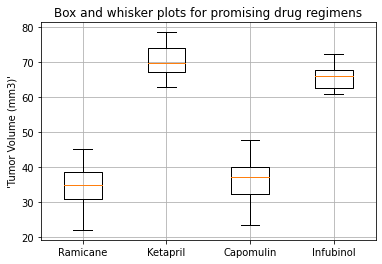

In [100]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
pos = [1,2,3,4]
lab = ["Ramicane", "Ketapril", "Capomulin", "Infubinol"]
plt.boxplot([
    rami_reg['Tumor Volume (mm3)'],
    keta_reg['Tumor Volume (mm3)'],
    capo_reg['Tumor Volume (mm3)'],
    infu_reg['Tumor Volume (mm3)']],
    positions=pos,
    labels=lab
)
plt.ylabel("'Tumor Volume (mm3)'")
plt.grid()
plt.title("Box and whisker plots for promising drug regimens")
plt.show()

## Line and scatter plots

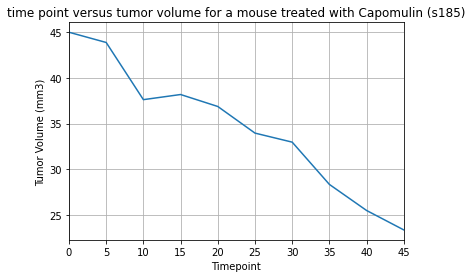

In [99]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin (s185)
cap_single = merged_study.loc[merged_study["Mouse ID"] == "s185"]
plt.plot(cap_single['Timepoint'], cap_single["Tumor Volume (mm3)"])
plt.xlim(0,45)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("time point versus tumor volume for a mouse treated with Capomulin (s185)")
plt.grid()

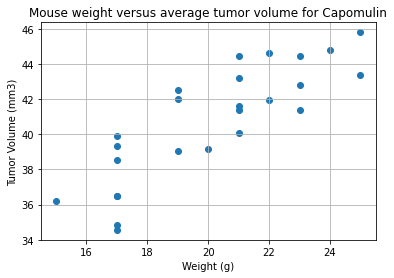

In [139]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_all = merged_study.loc[merged_study["Drug Regimen"] == "Capomulin"]
capo_grp = capo_all.groupby("Mouse ID")
x_axis = capo_grp['Weight (g)'].mean()
y_axis = capo_grp["Tumor Volume (mm3)"].mean()
plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight versus average tumor volume for Capomulin")
plt.grid()

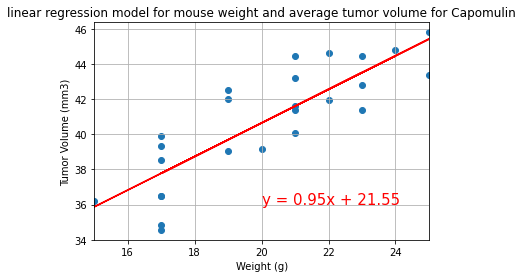

In [138]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(15,25)
plt.title("linear regression model for mouse weight and average tumor volume for Capomulin")
plt.grid()